In [36]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### data downloaded from https://www.kaggle.com/secareanualin/football-events

#### The dataset provides a granular view of 9,074 games, totaling 941,009 events from the biggest 5 European football (soccer) leagues: England, Spain, Germany, Italy, France from 2011/2012 season to 2016/2017 season as of 25.01.2017. There are games that have been played during these seasons for which I could not collect detailed data. Overall, over 90% of the played games during these seasons have event data.

In [2]:
os.getcwd()

'/home/den/Documents/git/foot_stats'

In [9]:
events = pd.read_csv('/home/den/Documents/git_data/football-events/events.csv', na_values='NaN')

,sort_order,time,event_type,event_type2,side,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
count,941009.000000,941009.000000,941009.000000,214293.000000,941009.000000,227459.000000,228498.000000,941009.000000,467067.000000,229185.000000,941009.000000,229137.000000,941009.000000
mean,53.858826,49.663663,4.326575,12.233764,1.481170,5.733693,1.926555,0.025978,6.209073,1.624831,0.264332,1.281316,0.004876
std,32.014268,26.488977,2.995313,0.468850,0.499646,3.326100,0.797055,0.159071,5.421736,0.740400,0.655501,0.709394,0.069655
min,1.000000,0.000000,1.000000,12.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,27.000000,27.000000,2.000000,12.000000,1.000000,2.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000
50%,53.000000,51.000000,3.000000,12.000000,1.000000,5.000000,2.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000
75%,79.000000,73.000000,8.000000,12.000000,2.000000,9.000000,3.000000,0.000000,11.000000,2.000000,0.000000,1.000000,0.000000
max,180.000000,100.000000,11.000000,15.000000,2.000000,13.000000,4.000000,1.000000,19.000000,3.000000,4.000000,4.000000,1.000000


In [10]:
events.dtypes

id_odsp           object
id_event          object
sort_order         int64
time               int64
text              object
event_type         int64
event_type2      float64
side               int64
event_team        object
opponent          object
player            object
player2           object
player_in         object
player_out        object
shot_place       float64
shot_outcome     float64
is_goal            int64
location         float64
bodypart         float64
assist_method      int64
situation        float64
fast_break         int64
dtype: object

In [5]:
#how to check is null
#events[events['event_type2'].isnull()]

In [11]:
events.columns

Index(['id_odsp', 'id_event', 'sort_order', 'time', 'text', 'event_type',
       'event_type2', 'side', 'event_team', 'opponent', 'player', 'player2',
       'player_in', 'player_out', 'shot_place', 'shot_outcome', 'is_goal',
       'location', 'bodypart', 'assist_method', 'situation', 'fast_break'],
      dtype='object')

In [12]:
events['event_type_descr'] = np.nan
events.loc[events['event_type'] == 0, 'event_type_descr'] = 'Announcement'
events.loc[events['event_type'] == 1, 'event_type_descr'] = 'Attempt'
events.loc[events['event_type'] == 2, 'event_type_descr'] = 'Corner'
events.loc[events['event_type'] == 3, 'event_type_descr'] = 'Foul'
events.loc[events['event_type'] == 4, 'event_type_descr'] = 'Yellow card'
events.loc[events['event_type'] == 5, 'event_type_descr'] = 'Second yellow card'
events.loc[events['event_type'] == 6, 'event_type_descr'] = 'Red card'
events.loc[events['event_type'] == 7, 'event_type_descr'] = 'Substitution'
events.loc[events['event_type'] == 8, 'event_type_descr'] = 'Free kick won'
events.loc[events['event_type'] == 9, 'event_type_descr'] = 'Offside'
events.loc[events['event_type'] == 10, 'event_type_descr'] = 'Hand ball'
events.loc[events['event_type'] == 11, 'event_type_descr'] = 'Penalty conceded'

events['event_type2_descr'] = np.nan
events.loc[events['event_type2'] == 12, 'event_type2_descr'] = 'Key Pass'
events.loc[events['event_type2'] == 13, 'event_type2_descr'] = 'Failed through ball'
events.loc[events['event_type2'] == 14, 'event_type2_descr'] = 'Sending off'
events.loc[events['event_type2'] == 15, 'event_type2_descr'] = 'Own goal'

events['side_descr'] = np.nan
events.loc[events['side'] == 1, 'side_descr'] = 'Home'
events.loc[events['side'] == 2, 'side_descr'] = 'Away'

events['shot_place_descr'] = np.nan
events.loc[events['shot_place'] == 1, 'shot_place_descr'] = 'Bit too high'
events.loc[events['shot_place'] == 2, 'shot_place_descr'] = 'Blocked'
events.loc[events['shot_place'] == 3, 'shot_place_descr'] = 'Bottom left corner'
events.loc[events['shot_place'] == 4, 'shot_place_descr'] = 'Bottom right corner'
events.loc[events['shot_place'] == 5, 'shot_place_descr'] = 'Centre of the goal'
events.loc[events['shot_place'] == 6, 'shot_place_descr'] = 'High and wide'
events.loc[events['shot_place'] == 7, 'shot_place_descr'] = 'Hits the bar'
events.loc[events['shot_place'] == 8, 'shot_place_descr'] = 'Misses to the left'
events.loc[events['shot_place'] == 9, 'shot_place_descr'] = 'Misses to the right'
events.loc[events['shot_place'] == 10, 'shot_place_descr'] = 'Too high'
events.loc[events['shot_place'] == 11, 'shot_place_descr'] = 'Top centre of the goal'
events.loc[events['shot_place'] == 12, 'shot_place_descr'] = 'Top left corner'
events.loc[events['shot_place'] == 13, 'shot_place_descr'] = 'Top right corner'

events['shot_outcome_descr'] = np.nan
events.loc[events['shot_outcome'] == 1, 'shot_outcome_descr'] = 'On target'
events.loc[events['shot_outcome'] == 2, 'shot_outcome_descr'] = 'Off target'
events.loc[events['shot_outcome'] == 3, 'shot_outcome_descr'] = 'Blocked'
events.loc[events['shot_outcome'] == 4, 'shot_outcome_descr'] = 'Hit the bar'

events['location_descr'] = np.nan
events.loc[events['location'] == 1, 'location_descr'] = 'Attacking half'
events.loc[events['location'] == 2, 'location_descr'] = 'Defensive half'
events.loc[events['location'] == 3, 'location_descr'] = 'Centre of the box'
events.loc[events['location'] == 4, 'location_descr'] = 'Left wing'
events.loc[events['location'] == 5, 'location_descr'] = 'Right wing'
events.loc[events['location'] == 6, 'location_descr'] = 'Difficult angle and long range'
events.loc[events['location'] == 7, 'location_descr'] = 'Difficult angle on the left'
events.loc[events['location'] == 8, 'location_descr'] = 'Difficult angle on the right'
events.loc[events['location'] == 9, 'location_descr'] = 'Left side of the box'
events.loc[events['location'] == 10, 'location_descr'] = 'Left side of the six yard box'
events.loc[events['location'] == 11, 'location_descr'] = 'Right side of the box'
events.loc[events['location'] == 12, 'location_descr'] = 'Right side of the six yard box'
events.loc[events['location'] == 13, 'location_descr'] = 'Very close range'
events.loc[events['location'] == 14, 'location_descr'] = 'Penalty spot'
events.loc[events['location'] == 15, 'location_descr'] = 'Outside the box'
events.loc[events['location'] == 16, 'location_descr'] = 'Long range'
events.loc[events['location'] == 17, 'location_descr'] = 'More than 35 yards'
events.loc[events['location'] == 18, 'location_descr'] = 'More than 40 yards'
events.loc[events['location'] == 19, 'location_descr'] = 'Not recorded'

events['bodypart_descr'] = np.nan
events.loc[events['bodypart'] == 1, 'bodypart_descr'] = 'right foot'
events.loc[events['bodypart'] == 2, 'bodypart_descr'] = 'left foot'
events.loc[events['bodypart'] == 3, 'bodypart_descr'] = 'head'

events['assist_method_descr'] = np.nan
events.loc[events['assist_method'] == 0, 'assist_method_descr'] = 'None'
events.loc[events['assist_method'] == 1, 'assist_method_descr'] = 'Pass'
events.loc[events['assist_method'] == 2, 'assist_method_descr'] = 'Cross'
events.loc[events['assist_method'] == 3, 'assist_method_descr'] = 'Headed pass'
events.loc[events['assist_method'] == 4, 'assist_method_descr'] = 'Through ball'

events['situation_descr'] = np.nan
events.loc[events['situation'] == 1, 'situation_descr'] = 'Open play'
events.loc[events['situation'] == 2, 'situation_descr'] = 'Set piece'
events.loc[events['situation'] == 3, 'situation_descr'] = 'Corner'
events.loc[events['situation'] == 4, 'situation_descr'] = 'Free kick'

events

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,fast_break,event_type_descr,event_type2_descr,side_descr,shot_place_descr,shot_outcome_descr,location_descr,bodypart_descr,assist_method_descr,situation_descr
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,...,0,Attempt,Key Pass,Away,High and wide,Off target,Left side of the box,left foot,Pass,Open play
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,0,Corner,NaN,Home,NaN,NaN,NaN,NaN,None,NaN
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,0,Corner,NaN,Home,NaN,NaN,NaN,NaN,None,NaN
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,...,0,Foul,NaN,Home,NaN,NaN,NaN,NaN,None,NaN
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,...,0,Free kick won,NaN,Away,NaN,NaN,Defensive half,NaN,None,NaN
5,UFot0hit/,UFot0hit6,6,9,Hand ball by Jose Paolo Guerrero (Hamburg).,10,NaN,2,Hamburg SV,Borussia Dortmund,...,0,Hand ball,NaN,Away,NaN,NaN,NaN,NaN,None,NaN
6,UFot0hit/,UFot0hit7,7,10,"Corner, Hamburg. Conceded by Lukasz Piszczek.",2,NaN,2,Hamburg SV,Borussia Dortmund,...,0,Corner,NaN,Away,NaN,NaN,NaN,NaN,None,NaN
7,UFot0hit/,UFot0hit8,8,11,Chris Lowe (Borussia Dortmund) wins a free kic...,8,NaN,1,Borussia Dortmund,Hamburg SV,...,0,Free kick won,NaN,Home,NaN,NaN,Defensive half,NaN,None,NaN
8,UFot0hit/,UFot0hit9,9,11,Foul by Gojko Kacar (Hamburg).,3,NaN,2,Hamburg SV,Borussia Dortmund,...,0,Foul,NaN,Away,NaN,NaN,NaN,NaN,None,NaN
9,UFot0hit/,UFot0hit10,10,13,Foul by Gokhan Tore (Hamburg).,3,NaN,2,Hamburg SV,Borussia Dortmund,...,0,Foul,NaN,Away,NaN,NaN,NaN,NaN,None,NaN


### Investigate number of games

In [15]:
events[['event_team','opponent']].drop_duplicates()

,event_team,opponent
0,Hamburg SV,Borussia Dortmund
1,Borussia Dortmund,Hamburg SV
110,FC Augsburg,SC Freiburg
111,SC Freiburg,FC Augsburg
232,Werder Bremen,Kaiserslautern
233,Kaiserslautern,Werder Bremen
369,Lorient,Paris Saint-Germain
371,Paris Saint-Germain,Lorient
483,Valenciennes,Caen
484,Caen,Valenciennes


In [34]:
distr_of_plays = pd.DataFrame(columns=['team','games'])
for team in list_of_teams:
    cnt = events[events['event_team'] == team]['id_odsp'].nunique()
    distr_of_plays = distr_of_plays.append({'team': team
                                           ,'games': cnt}, ignore_index=True)

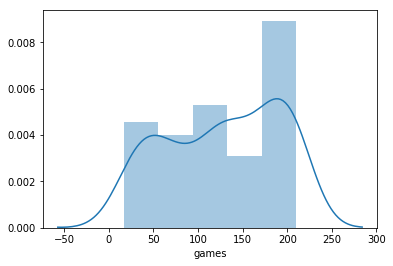

In [37]:
sns.distplot(distr_of_plays['games'])
plt.show()

In [41]:
unique_matches = events[['id_odsp','event_team','opponent']].drop_duplicates()
unique_matches

,id_odsp,event_team,opponent
0,UFot0hit/,Hamburg SV,Borussia Dortmund
1,UFot0hit/,Borussia Dortmund,Hamburg SV
110,Aw5DflLH/,FC Augsburg,SC Freiburg
111,Aw5DflLH/,SC Freiburg,FC Augsburg
232,bkjpaC6n/,Werder Bremen,Kaiserslautern
233,bkjpaC6n/,Kaiserslautern,Werder Bremen
369,CzPV312a/,Lorient,Paris Saint-Germain
371,CzPV312a/,Paris Saint-Germain,Lorient
483,GUOdmtII/,Valenciennes,Caen
484,GUOdmtII/,Caen,Valenciennes


In [42]:
events

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,fast_break,event_type_descr,event_type2_descr,side_descr,shot_place_descr,shot_outcome_descr,location_descr,bodypart_descr,assist_method_descr,situation_descr
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,...,0,Attempt,Key Pass,Away,High and wide,Off target,Left side of the box,left foot,Pass,Open play
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,0,Corner,NaN,Home,NaN,NaN,NaN,NaN,None,NaN
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,0,Corner,NaN,Home,NaN,NaN,NaN,NaN,None,NaN
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,...,0,Foul,NaN,Home,NaN,NaN,NaN,NaN,None,NaN
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,...,0,Free kick won,NaN,Away,NaN,NaN,Defensive half,NaN,None,NaN
5,UFot0hit/,UFot0hit6,6,9,Hand ball by Jose Paolo Guerrero (Hamburg).,10,NaN,2,Hamburg SV,Borussia Dortmund,...,0,Hand ball,NaN,Away,NaN,NaN,NaN,NaN,None,NaN
6,UFot0hit/,UFot0hit7,7,10,"Corner, Hamburg. Conceded by Lukasz Piszczek.",2,NaN,2,Hamburg SV,Borussia Dortmund,...,0,Corner,NaN,Away,NaN,NaN,NaN,NaN,None,NaN
7,UFot0hit/,UFot0hit8,8,11,Chris Lowe (Borussia Dortmund) wins a free kic...,8,NaN,1,Borussia Dortmund,Hamburg SV,...,0,Free kick won,NaN,Home,NaN,NaN,Defensive half,NaN,None,NaN
8,UFot0hit/,UFot0hit9,9,11,Foul by Gojko Kacar (Hamburg).,3,NaN,2,Hamburg SV,Borussia Dortmund,...,0,Foul,NaN,Away,NaN,NaN,NaN,NaN,None,NaN
9,UFot0hit/,UFot0hit10,10,13,Foul by Gokhan Tore (Hamburg).,3,NaN,2,Hamburg SV,Borussia Dortmund,...,0,Foul,NaN,Away,NaN,NaN,NaN,NaN,None,NaN
